# <center>Problem Set 6</center>

## <center> Due March 12 at 10:00 pm

The McHenry County Water Resource Specialist is looking for new ways to view data that is being collected by the county. The USGS is currently collecting data in real-time for a number of wells in McHenry County. Your task in this assignment is to create a potentiometric surface, in real-time, of this data, as well as to look at a surface from summer of 2019 and compare the differences. <b>The wells you will be using for this assignment can be found in the Excel file 'gwmchenry_deep.xlsx'. The files contains columns that (respectively) contain USGS Site Number, Site Name, and Land Surface Elevation.</b>

<i>Note that the code should take into account the possibility for outliers. In particular, think about what happens if your code includes 'NaN' head values (which can and likely will happen at some point over the next two weeks).</i>  

###<center>Part I: Compile Data for Each Well</center>

Using Python, create a Pandas DataFrame that contains the USGS Site Number as the index and columns showing: 
<ul>
    <li>Site Name</li>
    <li>Latitude</li>
    <li>Longitude</li>
    <li>Land Surface Elevation</li>
    <li>Date-time of the most recent data point</li>
    <li>Head (in ft above MSL) of the most recent data point</li>
</ul>

<b>Remember that the USGS web service will return depth to water. You need to convert this to a head.</b>

### <center>Part II: Create maps from this data</center>

Create maps showing the:
<ul>
    <li>Potentiometric surface for Summer 2019 (you may use 200 days prior to the most recent data point)</li>
    <li>Potentiometric surface for today</li>
    <li>Head difference (ft) between the two surfaces</li>
</ul>

Make sure that maps include the following:
<ul>
    <li>State boundaries</li>
    <li>Contours with labels</li>
    <li>A title with the date in a readable format</li>
    <li>A color flood</li>
    <li>A color bar</li>
</ul>

<b>You are responsible to search the internet and determine a  way to assign a color flood and color bar.</b>

### <center>Part III: Comparison with a 2013 study</center>

Conduct a qualitative analysis on the potentiometric surface generated in this assignment with the potentiometric surface generated in a 2013 study (see page 71, Figure 42 of the following report: https://www.ideals.illinois.edu/handle/2142/50040). Write a paragraph discussing these differences (qualitatively). Include an image of Figure 42 in your Jupyter Notebook, with a reference to the report.

In [0]:
# CoLab recommends to run the following two lines of code to import cartopy. 
#You will likely need to reinstall each time you log into CoLab, but it doesn't take too long. 
#You can keep running this even after installed, because it will recognize the install quickly.
!apt-get -qq install python-cartopy python3-cartopy
import cartopy

# And here we install pykrige. Note that this differs from a normal pip install in that it requires a leading "!"
!pip install pykrige

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
# import data from online
import urllib, json
from datetime import datetime
import pylab  # using as a plotting library for spatial data (looking at the contours)
import numpy as np # array package 

# import cartopy, which we will use to map
import cartopy.crs as ccrs                   # import projections
import cartopy.feature as cf                 # import features


# import the UniversalKriging function from pykrige.uk 
from pykrige.uk import UniversalKriging

In [8]:
df = pd.read_excel('https://github.com/dbabrams/Week6PotSurface\
/blob/master/gwmchenry_deep.xlsx?raw=true', index_col=0)
for index, row in df.iterrows():
  siteNum=str(index)
  # URL with streamflow/groundwater data from the USGS
  url = 'https://waterservices.usgs.gov/nwis/iv/?format=json&sites='\
  + siteNum + '&parameterCd=72019&siteStatus=all'
  #open the URL
  response = urllib.request.urlopen(url)
  # read the data in as a dictionary
  gw_data = json.loads(response.read())
  df.loc[index,'Latitude']=gw_data['value']['timeSeries'][0]['sourceInfo']['geoLocation']['geogLocation']['latitude']
  df.loc[index,'Longitude']=gw_data['value']['timeSeries'][0]['sourceInfo']['geoLocation']['geogLocation']['longitude']
  df.loc[index,'Date-Time']=pd.to_datetime(gw_data['value']['timeSeries'][0]['values'][0]['value'][0]['dateTime'])
  df.loc[index,'Head']=df.loc[index,'elevation']-float(gw_data['value']['timeSeries'][0]['values'][0]['value'][0]['value'])
  df = df.drop(df[df['Head'] > 3000].index)
print(df)

                                                   SiteName  ...    Head
SiteNum                                                      ...        
421056088380801                    43N5E-27.4h1 (14-RIL-S)   ...  800.22
421120088281801                   43N7E-19.8d (HUNT-09-03)   ...  853.94
421122088222702                    43N7E-23.1d2 (16-GRF-D)   ...  859.73
421145088194802                    43N8E-20.6h2 (17-ALG-D)   ...  778.77
421321088341101                   43N6E-07.1g (MARS-09-01)   ...  859.30
421341088283703                    43N6E-01.3b3 (15-COR-D)   ...  842.96
421533088421801   44N5E-30.8c1 (10-MAR-S) (McHenry Co CRN)   ...  776.99
421547088142301                   44N9E-25.1d (WAUC-02-12)   ...  745.54
421626088311401                    44N6E-22.4c1 (11-SEN-I)   ...  827.26
421653088370901                   44N5E-23.5g (MARN-09-02)   ...  811.25
421653088370902                  44N5E-23.5g2 (MARN-10-03)   ...  801.99
421747088270701                  44N7E-17.8h1 (WOOD

In [10]:
print(df[['Latitude','Longitude']])

ERROR! Session/line number was not unique in database. History logging moved to new session 60
                  Latitude  Longitude
SiteNum                              
421056088380801  42.182222 -88.635556
421120088281801  42.188872 -88.471706
421122088222702  42.189444 -88.374444
421145088194802  42.195833 -88.330000
421321088341101  42.222517 -88.569769
421341088283703  42.228056 -88.476944
421533088421801  42.259167 -88.705000
421547088142301  42.263167 -88.239750
421626088311401  42.273889 -88.520556
421653088370901  42.281378 -88.619247
421653088370902  42.281378 -88.619247
421747088270701  42.296419 -88.451942
421820088154501  42.305556 -88.262500
421914088125301  42.320647 -88.214758
422032088222001  42.342336 -88.372353
422120088330901  42.355561 -88.552367
422142088303103  42.361667 -88.508611
422308088195602  42.385556 -88.332222
422308088231002  42.385556 -88.386111
422308088264201  42.385464 -88.444908
422433088140601  42.409133 -88.235017
422704088385301  42.451111 -88.

In [9]:
UK = UniversalKriging(df['Longitude'], df['Latitude'], df['Head'], variogram_model='spherical',nlags=6)
print(UK) 

In [44]:
# define the area over which to plot data
minlat = 42.15
maxlat = 42.55
minlong = -88.8
maxlong = -88.1
# create xpoints and ypoints in space, with 0.01 spacing
xpoints = np.arange(minlong,maxlong,0.01)
ypoints = np.arange(minlat,maxlat,0.01)

# create a meshgrid with xpoints and ypoints, to be used later in the code
X,Y = np.meshgrid(xpoints,ypoints)

# calculate the interpolated grid and fill values.
z, var = UK.execute('grid', xpoints,ypoints)
z = z.filled(fill_value=None)
print(z)

[[800.24307257 797.63234374 795.09736241 ... 790.31287832 792.36589259
  794.56250838]
 [797.95393661 795.2055043  792.52955735 ... 788.36133875 790.5360213
  792.83694615]
 [795.73456071 792.84878109 790.10376343 ... 786.50762944 788.82308819
  791.25126679]
 ...
 [848.45492455 850.90366537 853.47104254 ... 844.85741749 845.58779208
  846.27870873]
 [849.49690477 851.98854614 854.59201172 ... 845.75536897 846.47004139
  847.13541872]
 [850.23769797 852.83928285 855.46535129 ... 846.53123191 847.22694654
  847.86296113]]


/usr/lib/python3/dist-packages/cartopy/mpl/geoaxes.py:1112: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


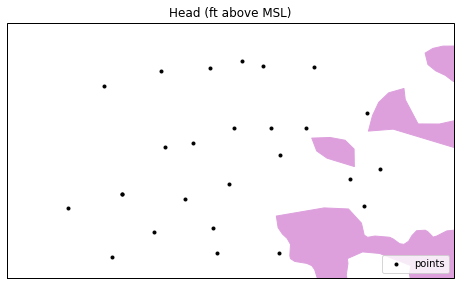

In [48]:
# Create a figure
fig = plt.figure(figsize=(8, 8))
# define a projection
ax = plt.axes(projection=ccrs.PlateCarree())
# define spatial domain to plot
ax.set_xlim(minlong,maxlong)
ax.set_ylim(minlat,maxlat)
# define title
ax.set_title("Head (ft above MSL)")
# states_provinces = cf.NaturalEarthFeature(
#     category='cultural', # features are categorized as cultural or physical
#     name='admin_1_states_provinces', # name of shapefile
#     scale='50m', # scale of features
#     facecolor='none')	
largerivers = cf.NaturalEarthFeature(
    category='physical',
    name='rivers_lake_centerlines',
    scale='110m', # major rivers
    facecolor='none')
smallrivers = cf.NaturalEarthFeature(
    category='physical',
    name='rivers_lake_centerlines_scale_rank',
    scale='10m', # smaller rivers (still considered major by many/most people)
    facecolor='none')   
popplaces = cf.NaturalEarthFeature(
    category='cultural',
    name='urban_areas', # plots municipal boundaries
    scale='10m',
    facecolor='plum') 
# adds the features defined above
ax.add_feature(popplaces,edgecolor='plum',linewidth=1.0)
ax.add_feature(largerivers,edgecolor='aqua',linewidth=2.0)
ax.add_feature(smallrivers,edgecolor='aqua',linewidth=2.0)
# create contours from the interpolation
cset = plt.contour(X,Y,z,np.arange(1000, 5000, 50),colors='blue')

# labels contours, makes use of pylab
pylab.clabel(cset, inline=1, fontsize=10,fmt='%1.0f')

# plot the points that were measured
plt.scatter(df['Longitude'], df['Latitude'], marker=".", color="black", label="points")
plt.legend(loc='lower right')
plt.title('Head (ft above MSL)')
plt.show()